               Title : Heart Failure Clinical Records Dataset

In [149]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_ind

In [11]:
df = pd.read_csv('C:/Users\praja\Downloads/heart_failure_clinical_records_dataset.csv')

In [19]:
#Print first 5 rows
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [20]:
# print last 5 rows
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [23]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [13]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [27]:
#Get some description of the data
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [29]:
#shape of the dataset
df.shape # 299 Columns and 13 Rows

(299, 13)

A bit more of the inner exploration of data, finding with the different columns and finding relationships between them.

In [33]:
df['sex'].value_counts() # 1 is Male and 0 is Female

sex
1    194
0    105
Name: count, dtype: int64

In [34]:
# 0 is No and 1 is Yes
df['high_blood_pressure'].value_counts()

high_blood_pressure
0    194
1    105
Name: count, dtype: int64

In [37]:
# 0 is No and 1 is Yes
df['smoking'].value_counts()

smoking
0    203
1     96
Name: count, dtype: int64

In [39]:
# 0 is No and 1 is Yes
df['diabetes'].value_counts()

diabetes
0    174
1    125
Name: count, dtype: int64

In [41]:
# 0 is No and 1 is Yes
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

Visualise the Data, via Seaborn and Matplotlib etc.

In [42]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


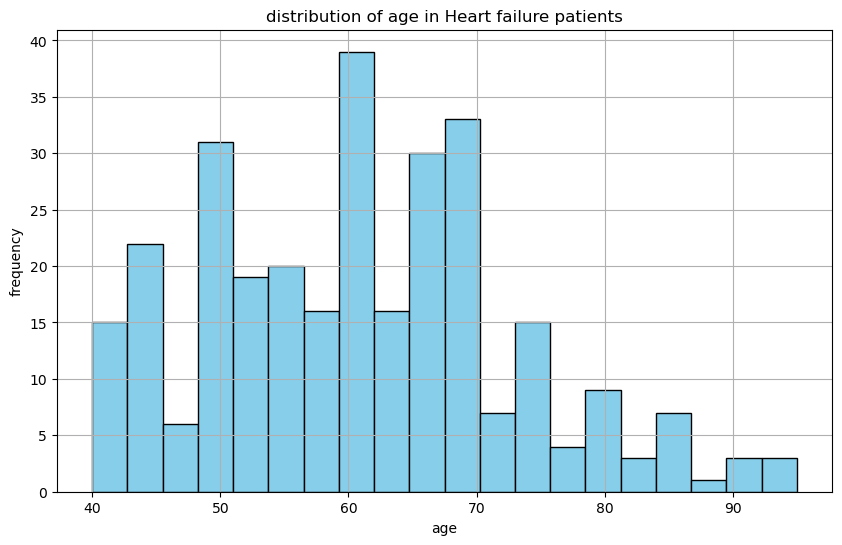

In [62]:
#1: What is the distribution of age among heart failure patients in the dataset.
plt.figure(figsize=(10,6))
plt.hist(df['age'],bins=20,color='skyblue',edgecolor='black')
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('distribution of age in Heart failure patients')
plt.grid(True)
plt.show()


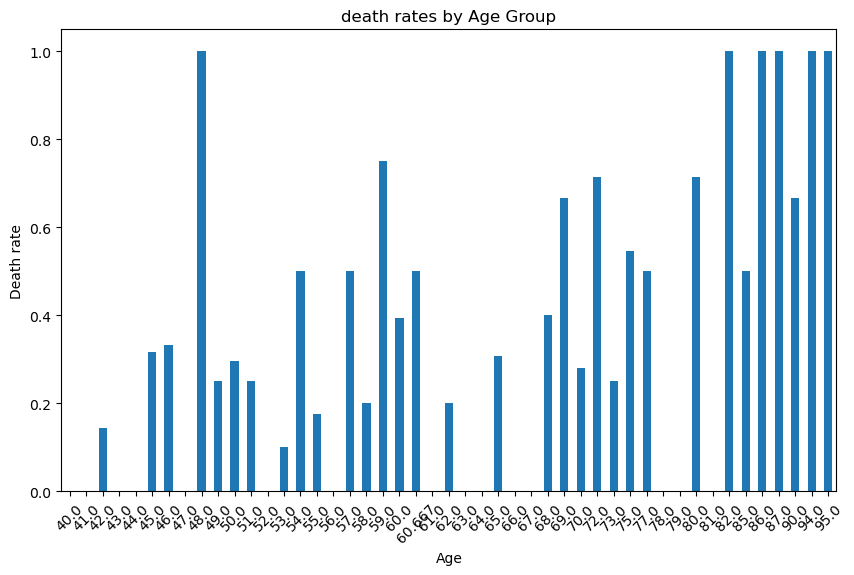

In [59]:
#2.How does the death rate vary with age?
   
# group by age and calculates death rates
death_rates_by_age = df.groupby('age')['DEATH_EVENT'].mean()

plt.figure(figsize=(10,6))
death_rates_by_age.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Death rate')
plt.title('death rates by Age Group')
plt.xticks(rotation=45)
plt.show()

#3. What is the percentage of male and female patients in the dataset?

In [104]:
# Count the number of male and female patients
gender_counts=df['sex'].value_counts()

# Calculate the percentage of male and female patients
total_patients = len(df)
percentage_male = (gender_counts[1]/total_patients)*100
percentage_female = (gender_counts[0]/total_patients)*100

#Print the results
print('percentage of male Patients:',percentage_male)
print('percentage of female patients:',percentage_female)

percentage of male Patients: 64.88294314381271
percentage of female patients: 35.11705685618729


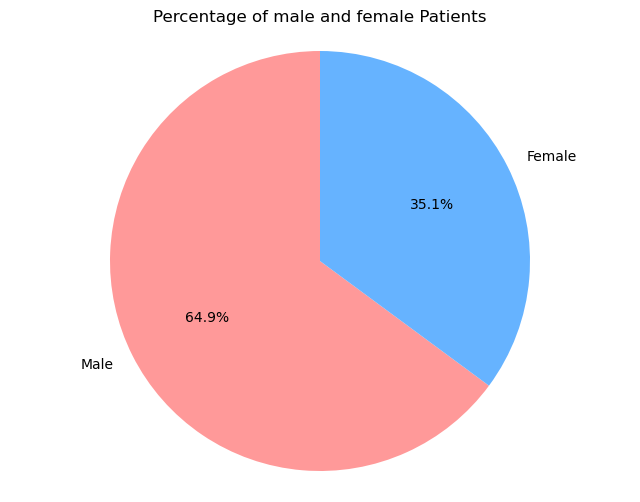

In [106]:
# create pie chart
#sizes = [percentage_male,percentage_female]

plt.figure(figsize=(8,6))
plt.pie([percentage_male,percentage_female],labels=['Male','Female'],colors =['#ff9999','#66b3ff'],autopct='%1.1f%%',startangle=90 )
plt.title('Percentage of male and female Patients')
plt.axis('equal')# Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


4. How does the platelet count vary among different age groups.

<Figure size 1000x600 with 0 Axes>

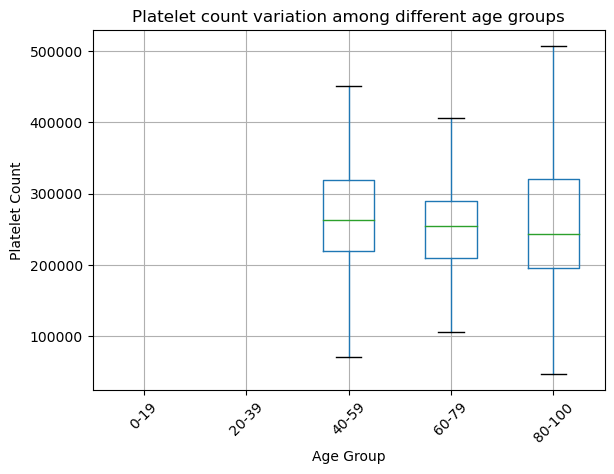

In [119]:

#Group data by age groups
df['age_group'] = pd.cut(df['age'],bins = [0,20,40,60,80,100],labels=['0-19','20-39','40-59','60-79','80-100'],right = False)

#calculate platelet count statistics for each age group
platelet_stats_by_age = df.groupby('age_group')['platelets'].describe()
#Visualize the relationship using box plot
plt.figure(figsize=(10,6))
df.boxplot(column='platelets',by='age_group',showfliers = False)
plt.title('Platelet count variation among different age groups')
plt.xlabel('Age Group')
plt.ylabel('Platelet Count')
plt.xticks(rotation=45)
plt.suptitle("")  # Remove default title
plt.show()

5.Is there a corelation between creatinine and sodium levels in the blood?

correlation coefficient between Creatinine and Sodium Levels: -0.18909521009117414


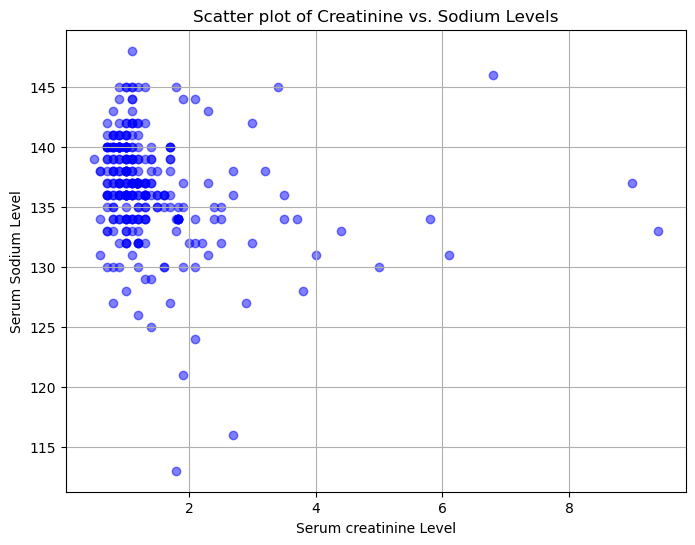

In [123]:
#Extract creatinine and sodium levels
creatinine_levels = df['serum_creatinine']
sodium_levels = df['serum_sodium']

#Calculate the correlation coefficient 
correlation_coefficient = creatinine_levels.corr(sodium_levels)
print('correlation coefficient between Creatinine and Sodium Levels:',correlation_coefficient)

#plot the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(creatinine_levels,sodium_levels,color= 'blue',alpha=0.5)
plt.title('Scatter plot of Creatinine vs. Sodium Levels')
plt.xlabel('Serum creatinine Level')
plt.ylabel('Serum Sodium Level')
plt.grid(True)
plt.show()

6. How does the prevalence of high blood pressure differ  between male and female patients?

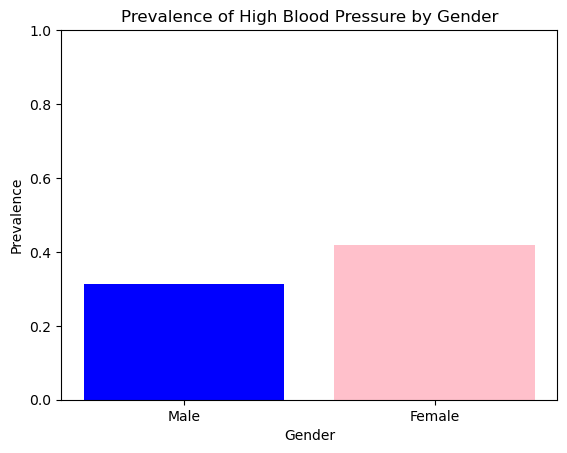

In [138]:
#Define a function to determine high blood pressure prevalence
def high_blood_pressure_prevalence(data):
    return (data['high_blood_pressure'] == 1).mean() #calculate the proporation of patients with high blood pressure

#Calculate high  blood pressure prevalence for male and female patients
male_prevalence = high_blood_pressure_prevalence(df[df['sex']==1])
female_prevalence = high_blood_pressure_prevalence(df[df['sex']==0])

#print the results
#print('Prevalence of High Blood Pressure Among Male Patients:',male_prevalence)
#print('Prevalence of High Blood Pressure Among Female Patients:',female_prevalence)

# plot the results
labels=['Male','Female']
prevalence=[male_prevalence,female_prevalence]

plt.bar(labels,prevalence,color=['blue','pink'])
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xlabel('Gender')
plt.ylabel('Prevalence')
plt.ylim(0,1) # set y-axis limit to ensure the range from 0 to 1
plt.show()

7. What is the relationship between smoking habits and the occurrence of heart failure?

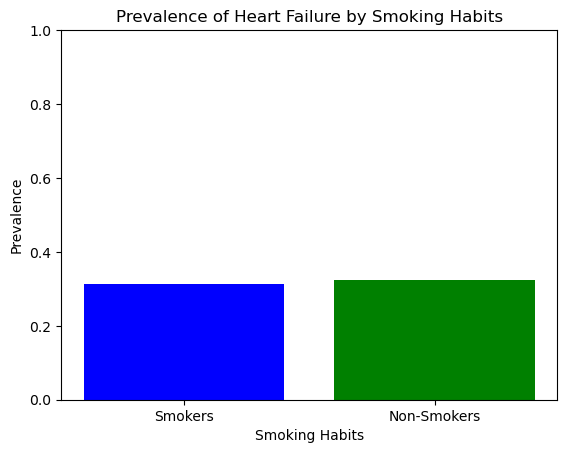

In [146]:
# Define a funnction to calculate the prevalence of heart failure among smokers and non-smokers
def heart_failure_prevalence_by_smoking(data,smoking_status):
    return (data[data['smoking'] == smoking_status]['DEATH_EVENT'] == 1).mean()

#Calculate heart failure prevalence for smokers and non-smokers
smoker_prevalence = heart_failure_prevalence_by_smoking(df,1)
non_smoker_prevalence = heart_failure_prevalence_by_smoking(df,0)

#Plot the results
labels=['Smokers','Non-Smokers']
prevalence=[smoker_prevalence,non_smoker_prevalence]

plt.bar(labels,prevalence,color=['blue','green'])
plt.title('Prevalence of Heart Failure by Smoking Habits')
plt.xlabel('Smoking Habits')
plt.ylabel('Prevalence')
plt.ylim(0,1) # Set y-axis limit to ensure the range from 0 to 1
plt.show()

8. Are there any noticeable patterns in the distribution of death events across different age groups?

<function matplotlib.pyplot.show(close=None, block=None)>

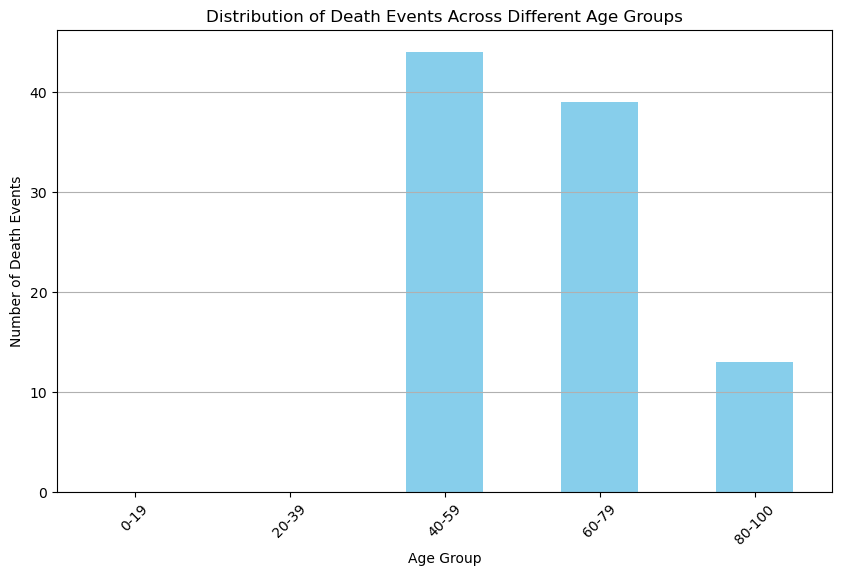

In [147]:

#Group databy age groups and count death events
death_events_by_age = df.groupby(pd.cut(df['age'],bins=[0,20,40,60,80,100],labels=['0-19','20-39','40-59','60-79','80-100']))['DEATH_EVENT'].sum()

#visualize the distribution using a bar plot
plt.figure(figsize=(10,6))
death_events_by_age.plot(kind='bar',color='skyblue')
plt.title('Distribution of Death Events Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Death Events')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show

9. Is there any significant difference in ejection fraction between patients with and without diabetes?

T-Statistic: -0.08358970647234736
p-value: 0.9334389630426103
There is no significant difference in ejection fraction between patients with and without diabetes.


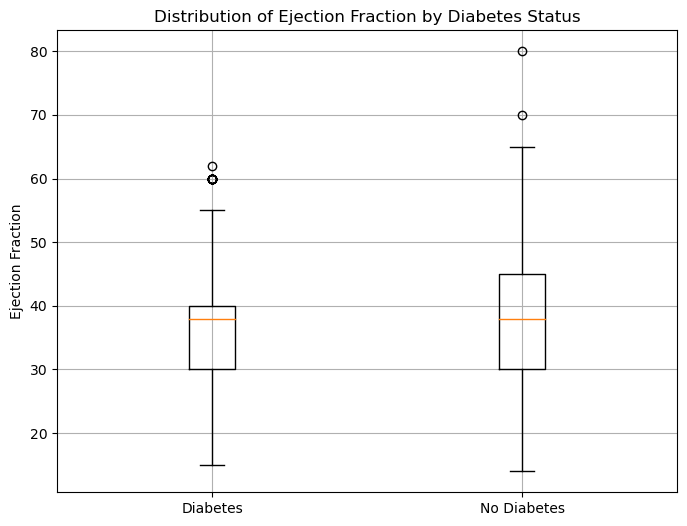

In [152]:
# Separate data for patients with and without diabetes
ejaction_fraction_diabetes = df[df['diabetes']==1]['ejection_fraction']
ejaction_fraction_no_diabetes = df[df['diabetes']==0]['ejection_fraction']

#Perform t-test
t_statistic, p_value = ttest_ind(ejaction_fraction_diabetes,ejaction_fraction_no_diabetes)

#plot box plots
plt.figure(figsize=(8,6))
plt.boxplot([ejaction_fraction_diabetes,ejaction_fraction_no_diabetes],labels=['Diabetes','No Diabetes'])
plt.title('Distribution of Ejection Fraction by Diabetes Status')
plt.ylabel('Ejection Fraction')
plt.grid(True)

#print the results
print('T-Statistic:',t_statistic)
print('p-value:',p_value)

#Interpret the results
alpha = 0.05
if p_value < alpha:
    print('There is a significant difference in ejection fraction between patients with and without diabetes.')
else:
    print('There is no significant difference in ejection fraction between patients with and without diabetes.')



10. How does the serum creatinine level vary between patients who survived and those who did not?

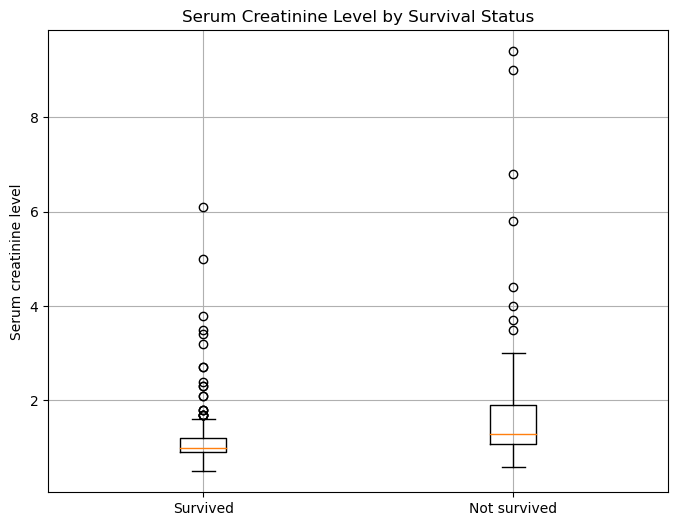

In [153]:
#Separate data for patients who survived and those who did not
creatinine_survived = df[df['DEATH_EVENT']==0]['serum_creatinine']
creatinine_not_survived = df[df['DEATH_EVENT']==1]['serum_creatinine']

# plot boxplots
plt.figure(figsize=(8,6))
plt.boxplot([creatinine_survived,creatinine_not_survived],labels=['Survived','Not survived'])
plt.title('Serum Creatinine Level by Survival Status')
plt.ylabel('Serum creatinine level')
plt.grid(True)
plt.show()